In [15]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

### Test Image Processing

In [16]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

#### Load Model

In [17]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

##### Test on Single Image

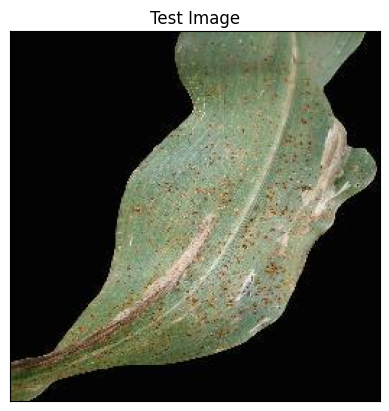

In [23]:
#Test Image Visualization
import cv2
image_path = 'test/test/CornCommonRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [24]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 53ms/step


In [25]:
print(predictions)

[[1.8318252e-29 7.1966247e-33 3.0763887e-30 3.7531231e-33 1.4627715e-30
  5.3185437e-38 3.5824028e-33 4.1075482e-23 1.0000000e+00 8.7959681e-30
  1.2915500e-32 2.2144977e-36 6.2051976e-35 5.5127046e-35 0.0000000e+00
  2.9082697e-30 1.5804116e-34 2.6550010e-36 1.3006686e-30 2.3670855e-31
  1.5304162e-25 4.7925293e-38 7.5859225e-31 1.3024762e-37 0.0000000e+00
  1.3148493e-33 3.1694083e-31 8.2941963e-35 1.9262802e-36 1.2732100e-33
  5.5351143e-24 2.6003247e-35 1.7825453e-35 0.0000000e+00 3.7242372e-36
  5.5139374e-38 0.0000000e+00 5.5092265e-31]]


In [26]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

8


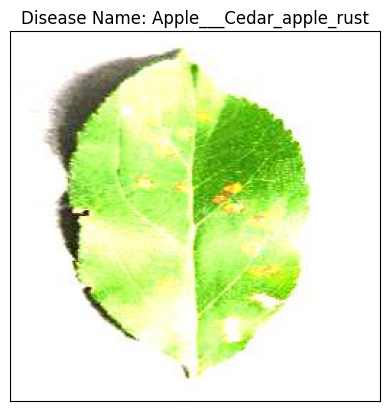

In [22]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()